---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    return len(df[df.Class == 1])/len(df)

answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_maj = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_predict = dummy_maj.predict(X_test)
    accuracy_score = dummy_maj.score(X_test, y_test)
    recall_score = recall_score(y_test, y_predict)
    
    return (accuracy_score, recall_score)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    svm = SVC().fit(X_train, y_train)
    y_predict = svm.predict(X_test)
    accuracy_score = svm.score(X_test, y_test)
    recall_score = recall_score(y_test, y_predict)
    precision_score = precision_score(y_test, y_predict)
    return (accuracy_score, recall_score, precision_score)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    y_scores = svm.decision_function(X_test) > -220
    
    confusion = confusion_matrix(y_test, y_scores)
    return confusion

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

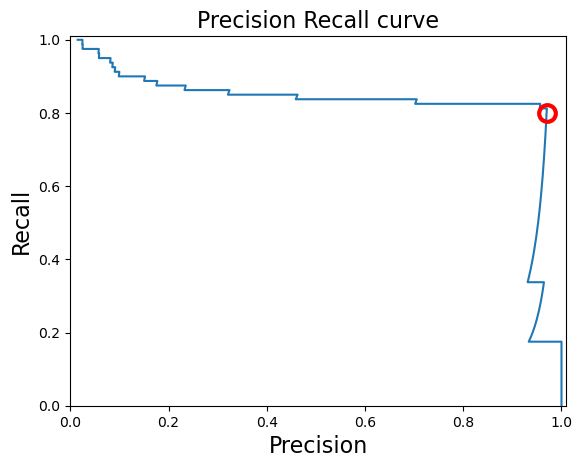

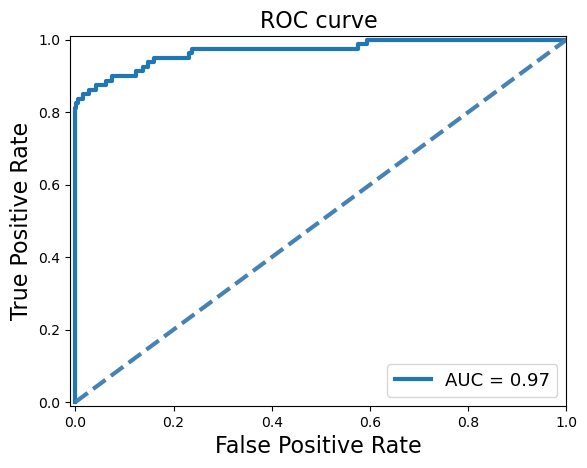

In [12]:
def plot_five(): 
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc    
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # prepare the data for the precision recall curve
    lr = LogisticRegression(solver='liblinear', max_iter=5000).fit(X_train, y_train)
    lr_predicted = lr.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    
    # prepare the data for the roc curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)

    # generate the precision recall curve plot
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.title('Precision Recall curve', fontsize=16)
    plt.show()

    # generate the roc curve plot
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='AUC = {:0.2f}'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='steelblue', lw=3, linestyle='--')
    plt.show()
    
plot_five()

In [13]:
def answer_five():        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    
    # prepare the data for the precision recall curve
    lr = LogisticRegression(solver='liblinear', max_iter=5000).fit(X_train, y_train)
    lr_predicted = lr.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, lr_predicted)
    
    # prepare the data for the roc curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_predicted)
    
    # get the recall value when the precision is 0.75
    target_precision = 0.75
    recall_at_target_precision = round(np.interp(target_precision, precision, recall),3)

    # get the true positive rate value when false positive rate is 0.16
    target_FPR = 0.16
    TPR_at_target_FPR = float(tpr_lr[np.where((fpr_lr >= 0.159) & (fpr_lr <= 0.161))][0])
    #TPR_at_target_FPR = round(np.interp(target_FPR, fpr_lr, tpr_lr),3)
            
    return (recall_at_target_precision, TPR_at_target_FPR)

answer_five()

(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [10]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    lr = LogisticRegression(solver='liblinear', max_iter=5000)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    grid_lr = GridSearchCV(lr, param_grid=grid_values, scoring='recall', cv=3)
    grid_lr.fit(X_train, y_train)
    result = grid_lr.cv_results_
    mean_test_score = result['mean_test_score']
    mean_test_score_reshape = mean_test_score.reshape(4,2)
    return mean_test_score_reshape

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

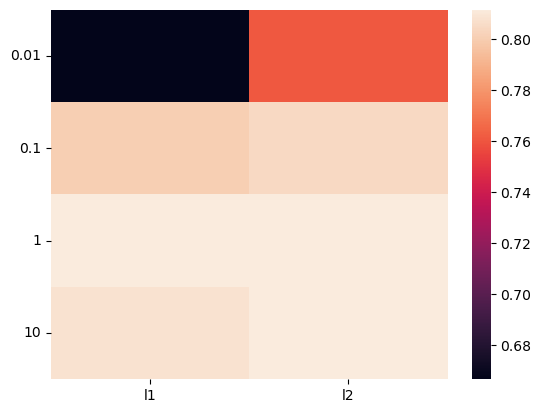

In [11]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())